In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from pandeia.engine.perform_calculation import perform_calculation
import json

Load in the .json file setting up most of the calculation.

In [2]:
jf = 'miri_tso_ima_setup.json'
with open(jf) as f:
    iminp = json.load(f)
    

Basic exposure settings for MIRI imaging:

In [3]:
px_scale = 0.11


ngrp = 20
nint = 1
nexp = 1

bgr = 'high'

rd = 'fast'
subarr = 'sub64'
filt = ['f560w', 'f770w', 'f1000w', 'f1130w', 'f1280w', 'f1500w', 'f1800w', 'f2100w', 'f2550w']
filt_fwhm = [0.22, 0.25, 0.32, 0.36, 0.41, 0.48, 0.58, 0.67, 0.82]
filt_grps = [20, 20, 20, 20, 20, 20, 50, 100, 500]


Initialise the aperture extraction **radii** we want to test. Start with aperture size in pixels, divide by 2 (for **radius**) then multiply by the pixel scale:

In [4]:
ap_x = [2.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0]
ap_r = [(i/2.)*px_scale for i in ap_x]


Now the code to perform the calculation for filter & aperture combos. Also set the background subtraction annulus explicitly here.

SNRs for filter f560w = [ 367.1676915   419.87315795  445.72203361  477.84974082  481.8806079
  475.97235699  467.97420992]
SNRs for filter f770w = [ 374.67481697  445.15747719  491.25894924  503.66493753  520.81648687
  515.27837054  495.05854498]
SNRs for filter f1000w = [ 234.28330277  284.1721165   346.59948542  345.70586382  335.69794597
  328.73762397  310.30601297]
SNRs for filter f1130w = [ 103.34806493  125.53999258  157.43534288  154.34133939  136.8796375
  122.48801379  110.67773684]
SNRs for filter f1280w = [ 152.7183654   186.8901914   246.10068654  255.72629783  234.80337931
  209.15928529  189.34643595]
SNRs for filter f1500w = [ 113.88557357  139.56947489  189.17722786  201.9238134   185.27347481
  157.06010793  132.52403552]
SNRs for filter f1800w = [ 102.50998328  125.57137816  173.63403339  190.0685715   177.87194188
  149.52634489  119.3298645 ]
SNRs for filter f2100w = [  83.1490594   101.25958656  139.0628101   151.85200492  142.99476775
  121.73246604   97.530856

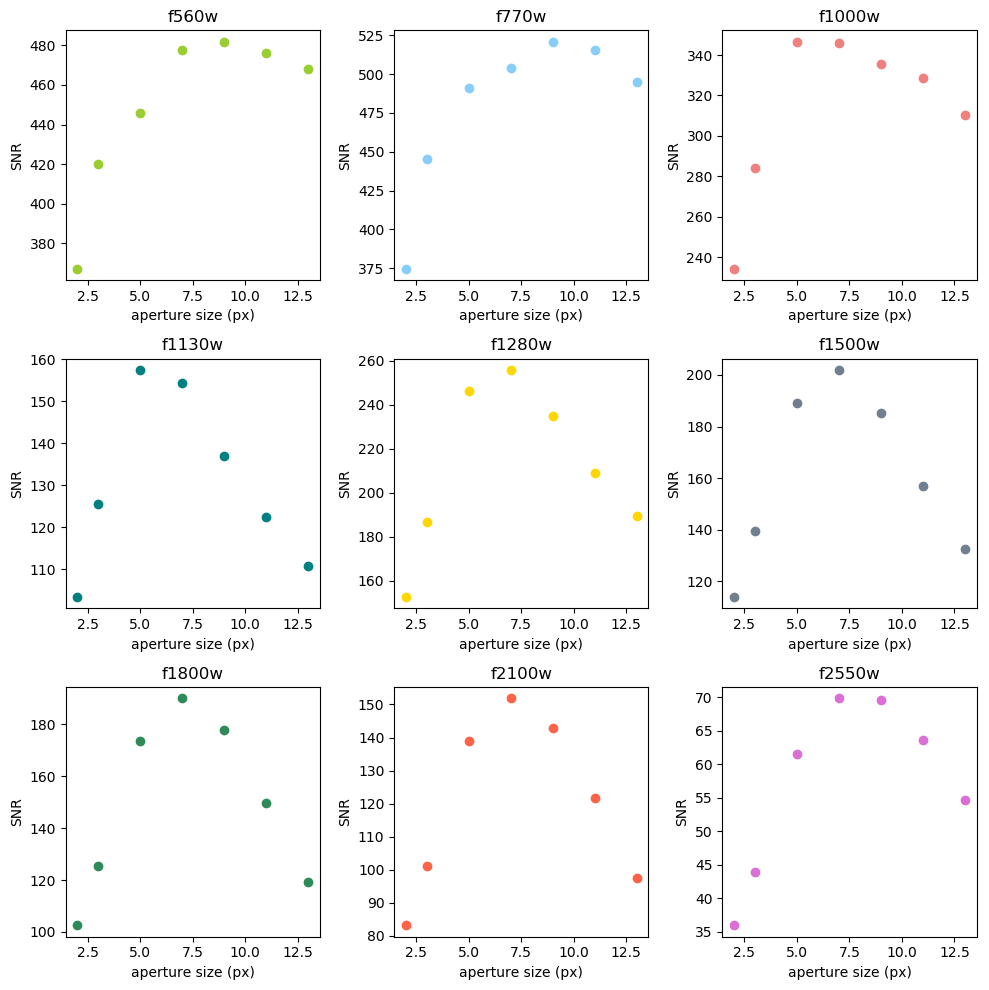

In [10]:
snfig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=[10,10])
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
nfilt = len(filt)
nap = len(ap_r)
sn = np.zeros(nap)

iminp['background'] = 'high'
c = ['yellowgreen', 'lightskyblue', 'lightcoral', 'teal', 'gold', 'slategray', 'seagreen', 'tomato', 'orchid']

iminp['strategy']['sky_annulus'] = [1.0, 1.2]

for f, grps, ax, col in zip(filt, filt_grps, axes, c):
    iminp['configuration']['instrument']['filter'] = f
    iminp['configuration']['detector']['ngroup'] = grps
    
    for i,r in enumerate(ap_r):
        iminp['strategy']['aperture_size'] = r
        out = perform_calculation(iminp)
        sn[i] = out['scalar']['sn']
        
    print 'SNRs for filter {0} = {1}'.format(f, sn)
    ax.plot(ap_x, sn, 'o', mfc=col, mec=col)
    ax.set_title(f)
    ax.set_xlabel('aperture size (px)')
    ax.set_ylabel('SNR')
    
snfig.tight_layout()
    
    
    
    
#print '{0}:  SNR = {1:2f}'.format(iminp['configuration']['instrument']['filter'], out['scalar']['sn'])

In [11]:
plt.savefig('ima_photometry_plots.png')

<Figure size 600x400 with 0 Axes>